# EXPLORATORY DATA ANALYSIS-TERRORISM

# AUTHOR-TANIA DAS

# TASK

#### Perform 'Exploratory Data Analysis' on dataset Global Terrorism.
#### As a security/defense analyst, try to fing the hot zones of Terrorism.
#### What all security issues and insights you can derive by EDA?

In [10]:
#filter out warnings
import warnings
warnings.filterwarnings("ignore")

### Importing The Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Setting The Working Directory

In [12]:
os.chdir(R"C:\Users\TANIA DAS\DATA PYTHON\GRIPS SPARKS FOUNDATION\Task 4")

### ReadingThe File

In [13]:
GT=pd.read_csv("globalterrorism.csv",encoding='latin1')

In [14]:
GT.head()#Checking the first 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
GT.shape #Checking the dimension of the data.

(181691, 135)

There are 135 columns and 181691 rows

In [16]:
GT.columns.values # Checking the column names

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Selecting The required Columns and Renaming Them

In [17]:
terror_df=GT[['iyear', 'imonth', 'iday','country_txt','region_txt','provstate', 'city','attacktype1_txt',
             'targtype1_txt','targsubtype1_txt','gname','weaptype1_txt','weapsubtype1_txt','nperps',
             'nkill','nwound','target1','motive']]
terrorr_df=(terror_df.rename(columns = {'iyear': 'year', 'imonth': 'month','iday':'day','country_txt':'country',
                                        'region_txt':'region','provstate':'state','attacktype1_txt':'attacktype',
                                        'targtype1_txt':'target','attacktype1_txt':'attacktype',
                                        'targsubtype1_txt':'targsubtype','gname':'group',
                                        'weaptype1_txt':'weapon','nperps':'perp','weapsubtype1_txt':'weaponsub',
                                        'nkill':'killed','nwound':'wounded'},inplace=True))

In [18]:
terror_df['casualities']=terror_df['killed']+terror_df['wounded'] 

In [19]:
terror_df.shape # Checking the shape of the final data

(181691, 19)

In [20]:
terror_df.dtypes #Checking the datatypes 

year             int64
month            int64
day              int64
country         object
region          object
state           object
city            object
attacktype      object
target          object
targsubtype     object
group           object
weapon          object
weaponsub       object
perp           float64
killed         float64
wounded        float64
target1         object
motive          object
casualities    float64
dtype: object

In [21]:
terror_df.info() # Checking the column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   attacktype   181691 non-null  object 
 8   target       181691 non-null  object 
 9   targsubtype  171318 non-null  object 
 10  group        181691 non-null  object 
 11  weapon       181691 non-null  object 
 12  weaponsub    160923 non-null  object 
 13  perp         110576 non-null  float64
 14  killed       171378 non-null  float64
 15  wounded      165380 non-null  float64
 16  target1      181055 non-null  object 
 17  motive       50561 non-null   object 
 18  casualities  164817 non-

In [22]:
terror_df.isnull().sum() # Checking the missing values

year                0
month               0
day                 0
country             0
region              0
state             421
city              434
attacktype          0
target              0
targsubtype     10373
group               0
weapon              0
weaponsub       20768
perp            71115
killed          10313
wounded         16311
target1           636
motive         131130
casualities     16874
dtype: int64

In [23]:
terror_df.describe() # Summary of all numerical data

,year,month,day,perp,killed,wounded,casualities
count,181691.000000,181691.000000,181691.000000,110576.000000,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,-65.361154,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,216.536633,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,-99.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,-99.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,25000.000000,1570.000000,8191.000000,9574.000000


### Handling Null Values

In [24]:
print(terror_df["state"].mode())
print(terror_df["city"].mode())
print(terror_df["targsubtype"].mode())
print(terror_df["target1"].mode())
print(terror_df["motive"].mode())
print(terror_df['weaponsub'].mode())

0    Baghdad
dtype: object
0    Unknown
dtype: object
0    Unnamed Civilian/Unspecified
dtype: object
0    Civilians
dtype: object
0    Unknown
dtype: object
0    Unknown Explosive Type
dtype: object


In [25]:
terror_df["state"]=terror_df["state"].fillna("Baghad")
terror_df["city"]=terror_df["city"].fillna("Unknown")
terror_df["targsubtype"]=terror_df["targsubtype"].fillna("Unnamed Civilian/Unspecified")
terror_df["target1"]=terror_df["target1"].fillna("Civilians")
terror_df["motive"]=terror_df["motive"].fillna("Unknown")
terror_df["weaponsub"]=terror_df["weaponsub"].fillna("Unknown Explosive Type")
terror_df["perp"]=terror_df["perp"].fillna(terror_df["perp"].median())
terror_df["killed"]=terror_df["killed"].fillna(terror_df["killed"].median())
terror_df["wounded"]=terror_df["wounded"].fillna(terror_df["wounded"].median())
terror_df["casualities"]=terror_df["casualities"].fillna(terror_df["casualities"].median())


In [26]:
terror_df.isnull().sum()

year           0
month          0
day            0
country        0
region         0
state          0
city           0
attacktype     0
target         0
targsubtype    0
group          0
weapon         0
weaponsub      0
perp           0
killed         0
wounded        0
target1        0
motive         0
casualities    0
dtype: int64

### Eploratory Data Analysis

In [27]:
print(' Total Number of people killed : ',terror_df['killed'].sum())
print(' Total Number of Casualities: ',terror_df['casualities'].sum())

 Total Number of people killed :  411868.0
 Total Number of Casualities:  889766.0


#### Year-Wise

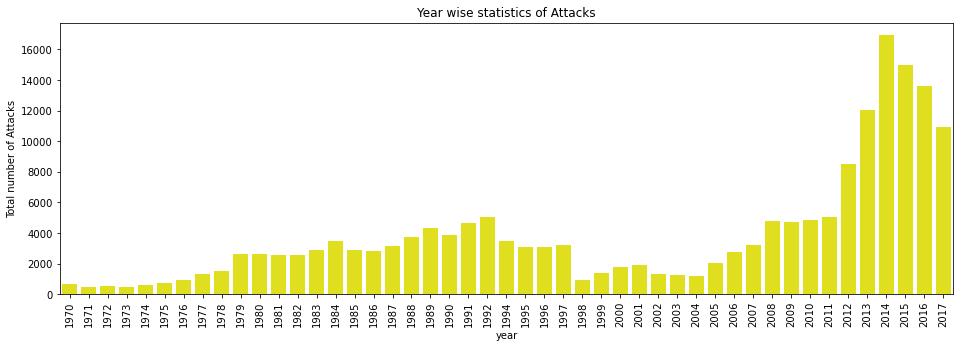

In [28]:
plt.figure(figsize=(16,5))
plt.title('Year wise statistics of Attacks')
sns.countplot(terror_df["year"],color="Yellow")
plt.xticks(rotation=90)
plt.ylabel('Total number of Attacks')
plt.show()

#### There has been a gradual increase in terror activities since 2004 and reached the highest value in year 2014 and gradually decreased till 2017.

#### Spike in Terrorism in 2014:

In [29]:
year2013=terror_df[terror_df["year"]==2013]
year2014=terror_df[terror_df["year"]==2014]
print('Percentage Increase of terrorist attack in 2014 compared to 2013',((len(year2014)-len(year2013))/len(year2013)*100))

Percentage Increase of terrorist attack in 2014 compared to 2013 40.43702226653373


<AxesSubplot:title={'center':'Country Wise Total Casualities'}, xlabel='country'>

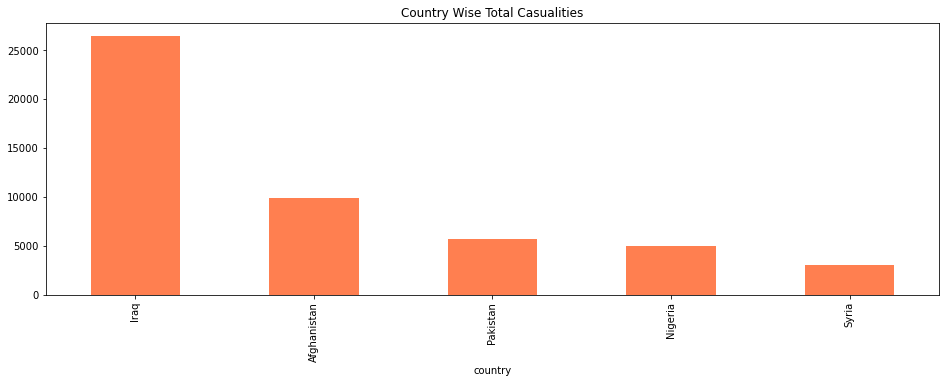

In [30]:
plt.title('Country Wise Total Casualities')
year2014.groupby("country")["casualities"].sum().sort_values(ascending=False).head().plot.bar(figsize=(16,5),color="#FF7F50")

#### The main reason for spike of Terrorism in 2014 is increase of attacks in Iraq, Afghanistan, Nigeria done by ISIL and Boko Haram 

Text(0.5, 1.0, 'Year Wise Killed And Wounded')

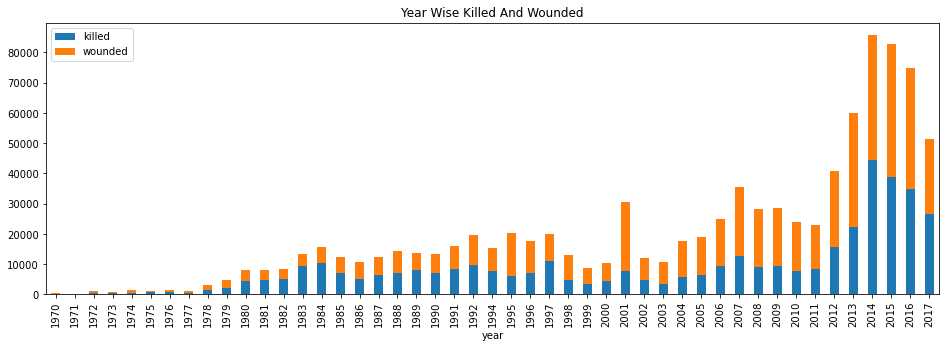

In [31]:
terror_df.groupby('year')['killed','wounded'].sum().plot.bar(stacked=True,figsize=(16,5))
plt.title('Year Wise Killed And Wounded')

#### The number of people killed almost doubled in 2014 compared to 2013 and number of casualities are very high from 2012 to 2017


#### Country-Wise

Text(0.5, 1.0, 'Country Wise Terrorist Attacks')

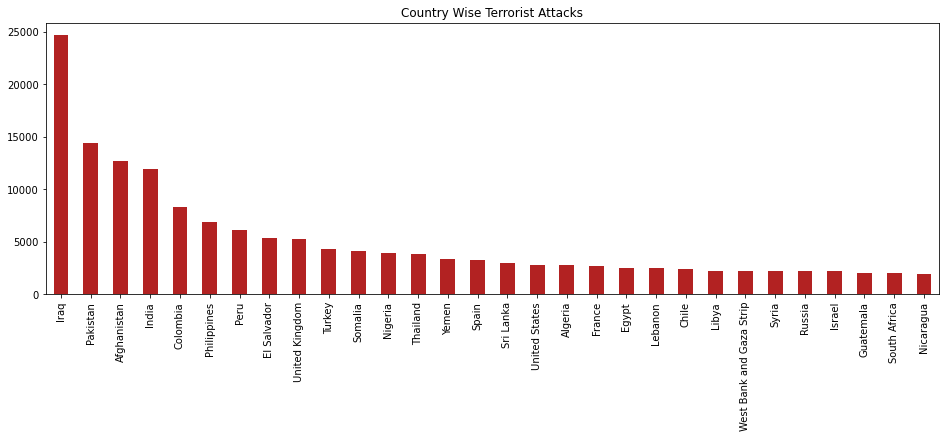

In [32]:
terror_df["country"].value_counts().head(30).plot.bar(figsize=(16,5),color="#B22222")
plt.title('Country Wise Terrorist Attacks')

#### Iraq , Pakistan , Afghanistan , India , Colombia are top 5 countries which faced highest number of Terrorist attacks during 1970-2017

Text(0.5, 1.0, 'Countries With Least Fatalities Due To Terrorism')

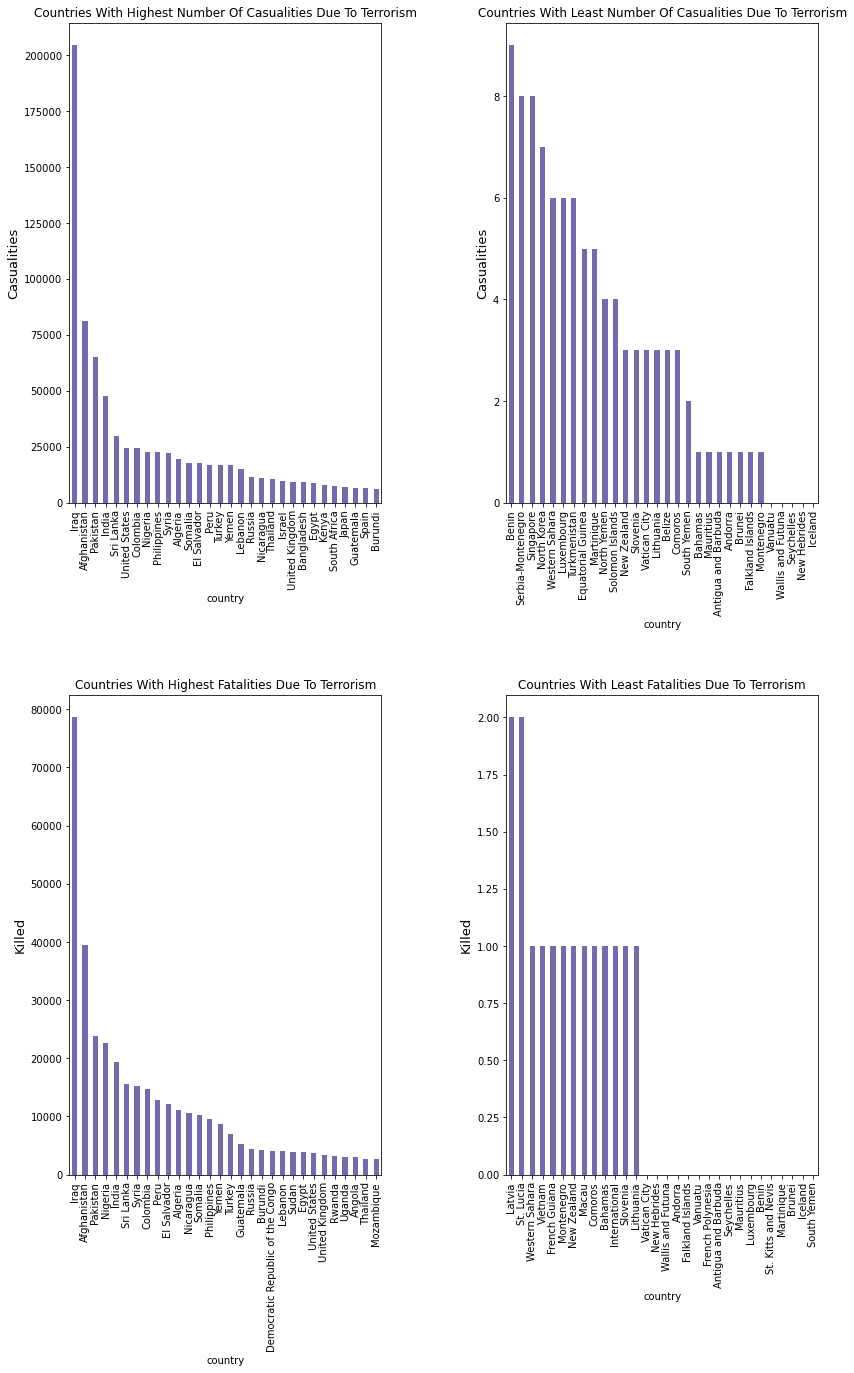

In [33]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=0.9,  top=0.9,  wspace=0.4,  hspace=0.4)
plt.subplot(2,2,1)
terror_df.groupby("country")["casualities"].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color="#746AB0")
plt.ylabel('Casualities',fontdict={'color':'black','fontsize':13})
plt.title('Countries With Highest Number Of Casualities Due To Terrorism',fontdict={'color':'black','size':12})
plt.subplot(2,2,2)
terror_df.groupby("country")["casualities"].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color="#746AB0")
plt.ylabel('Casualities',fontdict={'color':'black','fontsize':13})
plt.title('Countries With Least Number Of Casualities Due To Terrorism',fontdict={'color':'black','size':12})
plt.subplot(2,2,3)
terror_df.groupby("country")["killed"].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color="#746AB0")
plt.ylabel('Killed',fontdict={'color':'black','fontsize':13})
plt.title('Countries With Highest Fatalities Due To Terrorism',fontdict={'color':'black','size':12})
plt.subplot(2,2,4)
terror_df.groupby("country")["killed"].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color="#746AB0")
plt.ylabel('Killed',fontdict={'color':'black','fontsize':13})
plt.title('Countries With Least Fatalities Due To Terrorism',fontdict={'color':'black','size':12})

#### City-Wise

Text(0.5, 1.0, 'Cities With Most Terror Attacks')

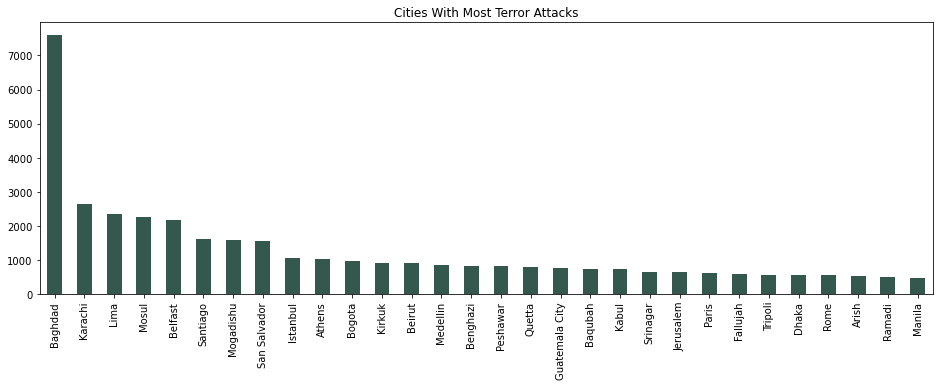

In [34]:
city_filter=terror_df[terror_df["city"]!="Unknown"]
city_filter["city"].value_counts().head(30).plot.bar(figsize=(16,5),color="#34574E")
plt.title('Cities With Most Terror Attacks',fontdict={'color':'black','size':12})

#### Baghdad , Karachi , Lima , Mosul , Belfast are cities where most terrorist attacks have occurred


Text(0.5, 1.0, 'Cities With Most Number Of Casualities')

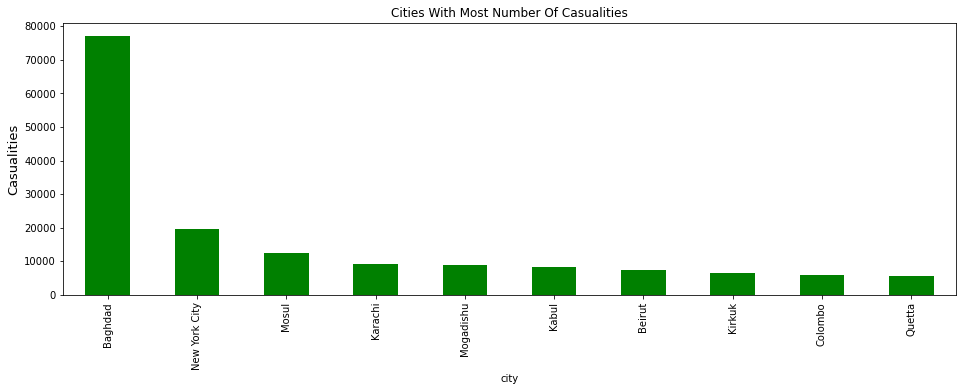

In [35]:
city_filter.groupby("city")["casualities"].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(16,5),color="Green")
plt.ylabel('Casualities',fontdict={'color':'black','fontsize':13})
plt.title('Cities With Most Number Of Casualities',fontdict={'color':'black','size':12})

#### Region-Wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Central America & Caribbean'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Southeast Asia'),
  Text(3, 0, 'Western Europe'),
  Text(4, 0, 'East Asia'),
  Text(5, 0, 'South America'),
  Text(6, 0, 'Eastern Europe'),
  Text(7, 0, 'Sub-Saharan Africa'),
  Text(8, 0, 'Middle East & North Africa'),
  Text(9, 0, 'Australasia & Oceania'),
  Text(10, 0, 'South Asia'),
  Text(11, 0, 'Central Asia')])

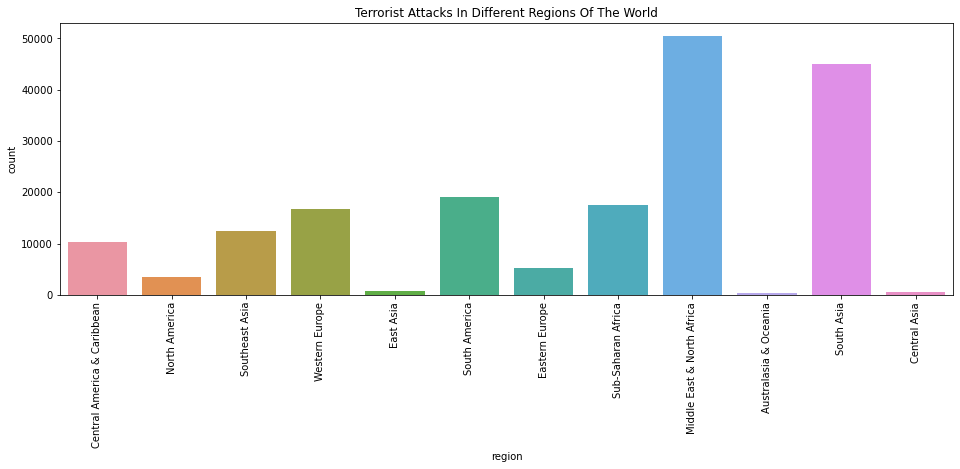

In [36]:
plt.subplots(figsize=(16,5))
sns.countplot(terror_df["region"])
plt.title('Terrorist Attacks In Different Regions Of The World')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region Wise Killed And Wounded')

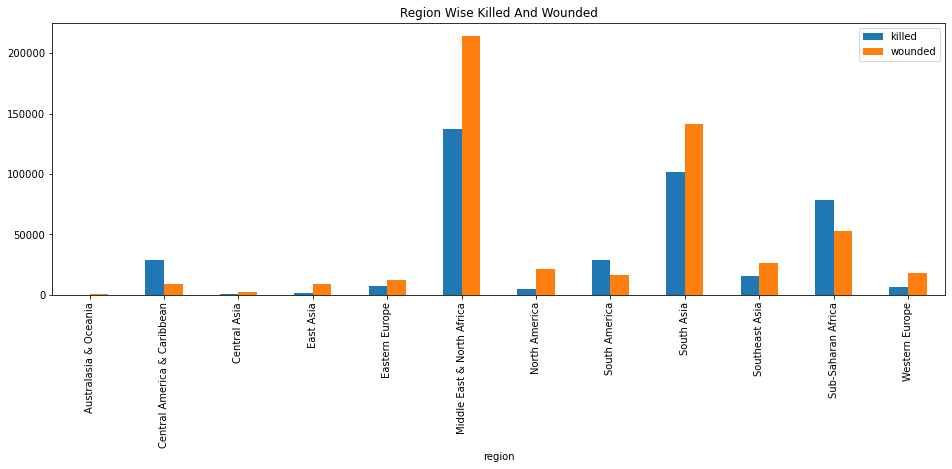

In [37]:
terror_df.groupby('region')['killed','wounded'].sum().plot.bar(figsize=(16,5))
plt.title('Region Wise Killed And Wounded')

#### East Asia , Central Asia and Australasia&Ocania are best region with less Attacks and Fatalities
#### Middle East & North Africa and South Asia are th emost attacked regions and have lost more than one Lakh People.

#### Attack Type and Weapon Type Analysis

Text(0.5, 1.0, 'Most Common Attack Type')

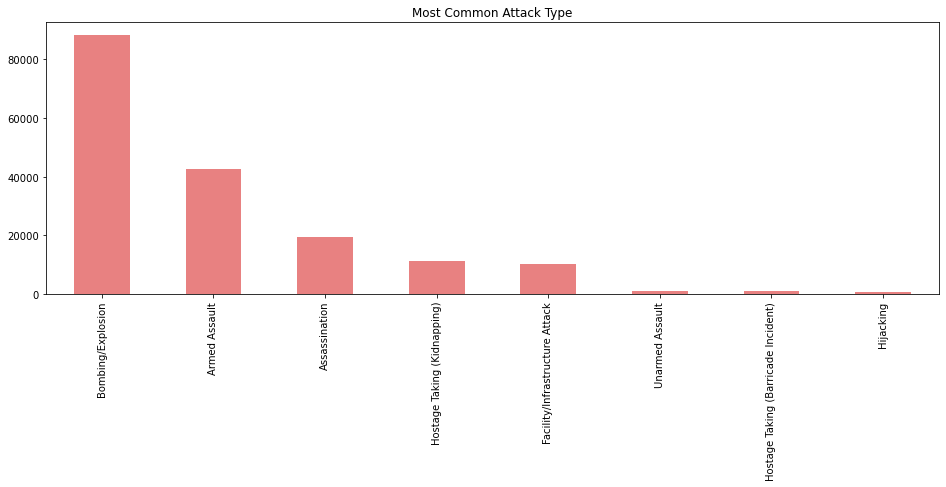

In [38]:
plt.figure(figsize=(16,5))
attack_filter=terror_df[terror_df["attacktype"]!="Unknown"]
attack_filter['attacktype'].value_counts().plot.bar(color="#E88181")
plt.title('Most Common Attack Type')

Text(0.5, 1.0, 'Most Used Weapons')

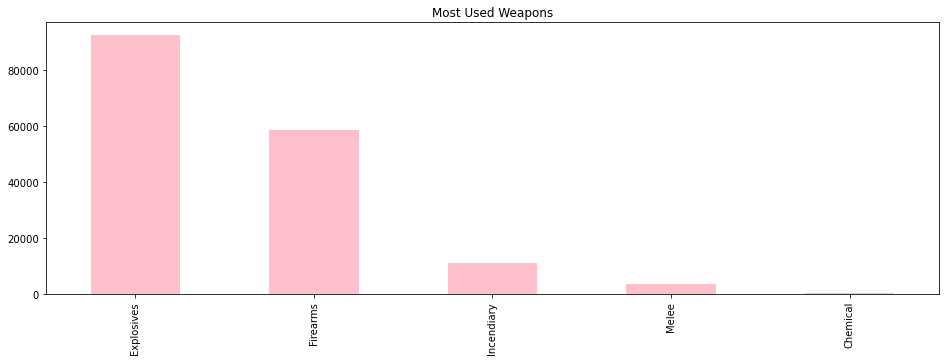

In [39]:
plt.figure(figsize=(16,5))
weapon_filter=terror_df[terror_df["weapon"]!="Unknown"]
weapon_filter['weapon'].value_counts().head(5).plot.bar(color="Pink")
plt.title('Most Used Weapons')

#### Explosives , Firearms , Incendiary are the most used weapons.
#### Bombing/Explosion, Armed Assault and Assassination are the most common type of Terrorist Attacks

In [40]:
country_list=terror_df.loc[terror_df['country'].isin(terror_df['country'].value_counts().nlargest(10).index.to_list())]
pd.crosstab(country_list.country,country_list.attacktype)

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country,,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
Colombia,1972,1343,3128,275,33,89,1058,14,394
El Salvador,2216,449,2055,194,0,117,154,1,134
India,3184,1229,4825,996,43,44,1184,143,312
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Peru,1328,1002,3115,223,8,74,97,4,245
Philippines,2158,1099,2213,452,34,53,602,4,293
Turkey,1289,437,1957,279,13,13,158,10,136


#### More than thousand people have been taken as hostages(kidnapping) in Afghanistan, Colombia and India.
#### Most Hijacking ( illegal seizure of a land vehicle, aircraft, or other conveyance while it is in transit ) have occurred in India, Philippines and Colombia
#### Armed assaults ( armed attack or conflict involves people fighting with guns or carrying weapons ) are Maximum in Pakistan, India , Iraq and Afghanistan.
#### Most Number of Assassinations have taken place in United Kingdom.
#### India and United Kingdom have suffered greatly by Infrastructure Attacks.
#### Most Bombing/Explosion happened in Iraq and Pakistan

In [41]:
pd.crosstab(terror_df.region,weapon_filter.weapon)

weapon,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
region,,,,,,,,,,,
Australasia & Oceania,0,11,80,0,74,74,10,1,0,0,1
Central America & Caribbean,0,2,3149,0,5679,435,65,0,0,5,4
Central Asia,0,2,254,1,232,15,14,0,0,0,0
East Asia,2,17,333,4,41,252,82,3,10,3,8
Eastern Europe,0,12,3089,4,1461,186,90,4,0,4,1
Middle East & North Africa,1,73,32283,6,11877,1181,1227,23,0,10,69
North America,24,26,1557,5,682,897,74,18,1,19,15
South America,1,26,9098,3,6525,1077,131,6,0,15,3
South Asia,2,83,22568,3,15169,2285,998,16,1,46,15


#### 1.North American Region has faced more number of Biological weaponed Attacks.
#### In the history of armed conflict, disease has often claimed more lives than combat. Intentionally introducing infectious agents to the battlefield is a dubious strategy at best, however, as biological weapons tend to be even more capricious than chemical weapons. Viruses and bacteria do not discriminate on the basis of uniform, insignia, or allegiance.
#### 2.South Asia , Middle East & North Africa and Western Europe has more number of Chemical weaponed Attacks.
#### 3.Nearly 10 Radiological Attacks have occurred in East Asia.
#### Establishing an effective and sustainable nuclear security infrastructure is crucial for the protection of the state, people, society and the environment.Key point to note is that the security of radiological materials is an important component of nuclear security.

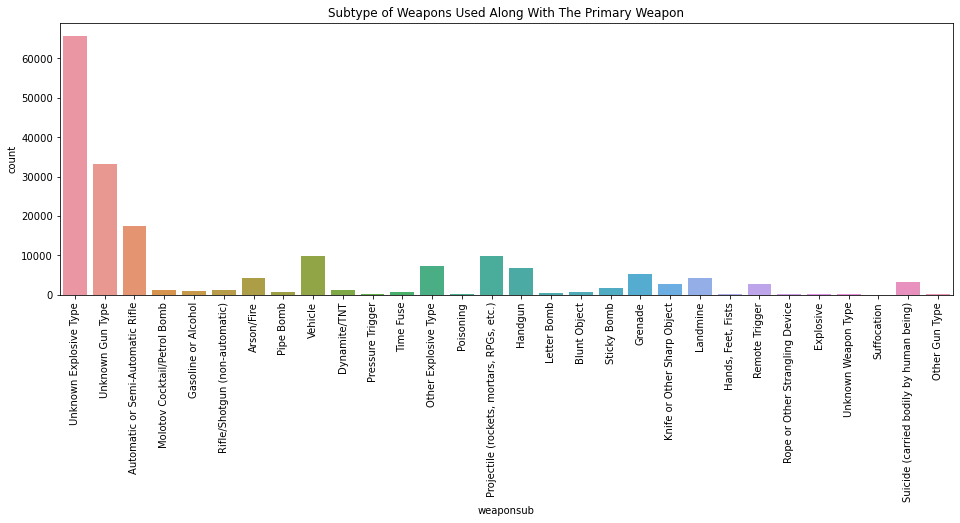

In [42]:
plt.figure(figsize=(16,5))
plt.title('Subtype of Weapons Used Along With The Primary Weapon')
sns.countplot(terror_df['weaponsub'])
plt.xticks(rotation=90)
plt.show()

#### We can see that there are various kinds of Subtypes of weapons Explosives, Guns, Rifles, Vehicles and Projectiles are most commonly paired with the first choice of weapon

Text(0.5, 1.0, 'Main Targets')

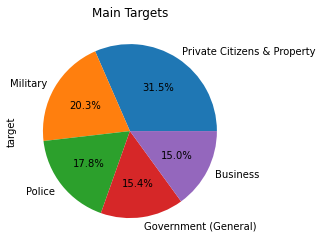

In [43]:
terror_df["target"].value_counts().head().plot.pie(autopct="%.1f%%")
plt.title("Main Targets")

#### Private Citizens & Property,Business, Government(General),Police and Military are the main targets of the attack.

In [44]:
pd.crosstab(country_list.target,country_list.country)

country,Afghanistan,Colombia,El Salvador,India,Iraq,Pakistan,Peru,Philippines,Turkey,United Kingdom
target,,,,,,,,,,
Abortion Related,0,0,0,0,0,0,0,0,0,1
Airports & Aircraft,64,70,12,28,32,58,37,26,38,29
Business,464,1340,584,1131,2112,1165,1164,976,636,891
Educational Institution,325,110,72,297,271,953,151,149,162,29
Food or Water Supply,14,15,11,12,25,26,51,16,5,2
Government (Diplomatic),151,86,64,19,127,104,117,32,88,36
Government (General),1626,1162,450,1727,2216,1167,1004,1326,461,327
Journalists & Media,80,196,128,87,178,176,157,101,70,17
Maritime,0,11,0,3,2,7,10,41,4,5


#### Nearly thousand Educational Institutions have been attacked in Pakistan.
#### Private Citizens & Property, Government, Journalists & Media, Police and Utilies are the Main targets in top Contries in terms of the number of terrorist attacks.
#### Most Religious Figues/ Institutions in Iraq and Pakistan have been subjected to terrorism .

#### Group Wise Analysis

Text(0.5, 1.0, 'Groups With Highest Number Of Attacks')

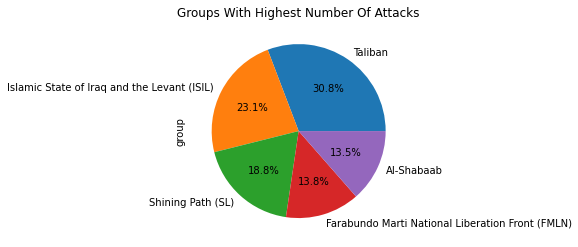

In [45]:
new=terror_df[terror_df["group"]!="Unknown"]
new["group"].value_counts().head().plot.pie(autopct="%.1f%%")
plt.title('Groups With Highest Number Of Attacks')

Text(0.5, 1.0, 'Terrorists groups responsible for most of the injuries')

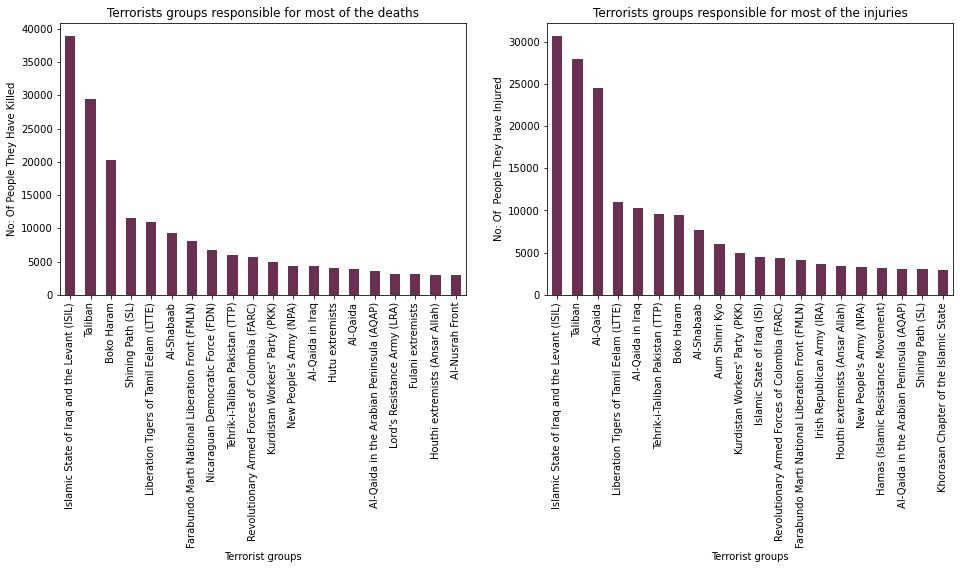

In [46]:
plt.subplot(1,2,1)
new.groupby(["group"])["killed"].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,5),color="#6B3051")
plt.xlabel('Terrorist groups')
plt.ylabel('No: Of People They Have Killed')
plt.title('Terrorists groups responsible for most of the deaths')
plt.subplot(1,2,2)
new.groupby(["group"])["wounded"].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,5),color="#6B3051")
plt.xlabel('Terrorist groups')
plt.ylabel('No: Of  People They Have Injured')
plt.title('Terrorists groups responsible for most of the injuries')

#### Terrorist organizations such as ISIL, Taliban are responsile for thousands of attacks and deaths of people, Military and Government Officials,loss of property and Bussiness.

### Hot Zones Of Terrorism

##### Iraq has one of the highest terror attacks and it is one of the prominent countries from the middle east. Baghdad is the capital of Iraq.Till this date Iraq is constantly at war. Many number of wars have taken place since 2017. The main targets also make sense since people are killed,property gets damaged from fire and explosions, and military are more likely to get attacked since its a war between groups and countries.
##### Pakistan and its previous capital Karachi also face most of the terrorism, the attacks are mostlty bombings and Armed Assault which caused loss of people and Educational Institutions.
##### Afghanistan is the second highest country with highest fatalities and casualities. 
##### India has suffered about 47000 casualities due to terrorism and Srinagar city of India is in top 30 attacked cities.

### Analysis

##### Terrorist organizations have long threatened the security, infrastructue, and citizens of nations and communities throughout the world. Counter- terrorism, incorporates the practice, military tactics, techniques and strategies are used by government and intelligence agencies to prevent terrorism.
##### Countries especially Iraq, Pakistan, Afghanistan, India should adopt more counter-terrorism methods to protect its people.
##### We have analysed the usage of different weapons and its sub types and how dangerously they can be used to cause different types of attacks.
##### We have performed country wise, region-wise and city wise analysis of terrorist attacks and also identified the targets.
